In [16]:
import pyaudio
import numpy as np

CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)

p=pyaudio.PyAudio() # start the PyAudio class
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK) #uses default input device

# create a numpy array holding a single read of audio data
for i in range(10): #to it a few times just to see
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    print(data.shape)

# close the stream gracefully
stream.stop_stream()
stream.close()
p.terminate()

(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)


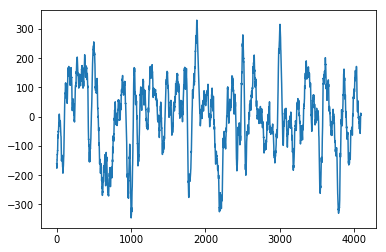

In [19]:
import matplotlib.pyplot as plt
import cffi
plt.plot(data)
plt.show()

In [26]:
import pyaudio
import time
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as signal



CHANNELS = 1
RATE = 44100

p = pyaudio.PyAudio()
fulldata = np.array([])
dry_data = np.array([])

def callback(in_data, frame_count, time_info, flag):
    global b,a,fulldata,dry_data,frames
    x = np.fromstring(in_data, dtype=np.float32)
#     do your audio process here
    
#     end audio process
    return (x, pyaudio.paContinue)

stream = p.open(format=pyaudio.paFloat32,
                channels=CHANNELS,
                rate=RATE,
                output=True,
                input=True,
                stream_callback=callback)

stream.start_stream()

while stream.is_active():
    time.sleep(1)
stream.stop_stream()

stream.close()

# numpydata = np.hstack(fulldata)
# plt.plot(numpydata)
# plt.title("Wet")
# plt.show()


# numpydata = np.hstack(dry_data)
# plt.plot(numpydata)
# plt.title("Dry")
# plt.show()


p.terminate()

NameError: name 'x' is not defined

In [27]:
stream.close()
p.terminate()

In [37]:
def speedx(sound_array, factor):
    """ Multiplies the sound's speed by some `factor` """
    indices = np.round( np.arange(0, len(sound_array), factor) )
    indices = indices[indices < len(sound_array)].astype(int)
    return sound_array[ indices.astype(int) ]

In [52]:
def stretch(sound_array, f, window_size, h):
    """ Stretches the sound by a factor `f` """

    phase  = np.zeros(window_size)
    hanning_window = np.hanning(window_size)
    result = np.zeros( int(len(sound_array) /f + window_size))

    for i in np.arange(0, len(sound_array)-(window_size+h), h*f):
        i = int(i)
        # two potentially overlapping subarrays
        a1 = sound_array[i: i + window_size]
        a2 = sound_array[i + h: i + window_size + h]

        # resynchronize the second array on the first
        s1 =  np.fft.fft(hanning_window * a1)
        s2 =  np.fft.fft(hanning_window * a2)
        phase = (phase + np.angle(s2/s1)) % 2*np.pi
        a2_rephased = np.fft.ifft(np.abs(s2)*np.exp(1j*phase))

        # add to result
        i2 = int(i/f)
        result[i2 : i2 + window_size] += hanning_window*a2_rephased.astype(float)

    result = ((2**(16-4)) * result/result.max()) # normalize (16bit)

    return result.astype('int16')

In [43]:
def pitchshift(snd_array, n, window_size=2**13, h=2**11):
    """ Changes the pitch of a sound by ``n`` semitones. """
    factor = 2**(1.0 * n / 12.0)
    stretched = stretch(snd_array, 1.0/factor, window_size, h)
    return speedx(stretched[window_size:], factor)

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


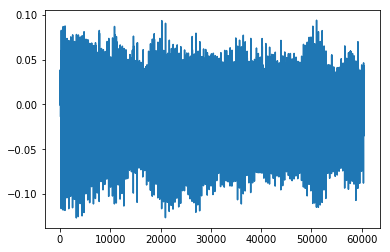

In [71]:
import librosa
data, fs = librosa.load("a.wav",sr=None)
data5 = pitchshift(data,5)

plt.plot(data)
plt.show()
data = data/max(data)
data5 = data5/max(data5)

data = data5
data = 0.3*(data/max(data))
p = pyaudio.PyAudio()
stream = p.open(format = pyaudio.paFloat32, channels = 1, rate = fs, output = True)
stream.write(data.astype(np.float32).tostring())